# DDO47 (NFW)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emcee
import corner
import math
from IPython.display import display, Math
from scipy.stats import norm
from scipy.special import iv, kv
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

In [2]:
#Membaca data kecepatan rotasi
gal = pd.read_excel('Galaksi LT.xlsx', sheet_name='Fisis')
df = pd.read_excel('Galaksi LT.xlsx', sheet_name='DDO47')
gal

,ID,rgas,rdisk,mgas,mdisk,mdisku,mdiskl,reff,rcs_n,rcs_s5,...,bf_ns5,bf_ns1,bf_ns10,bf_nf,bf_s5s1,bf_s5s10,bf_s5f,bf_s1s10,bf_s1f,bf_s10f
0,CVnIdwA,1.18,0.680,7.807535,6.612784,6.707570,6.491362,0.67,0.295,3.660,...,1.904035,0.686924,0.118260,0.269380,-1.217111,-1.785776,-1.634655,-0.568664,-0.417544,0.151120
1,DDO52,2.49,0.940,8.569374,7.721811,7.817560,7.598791,1.02,0.577,2.932,...,1.998812,0.438805,-0.048379,0.024691,-1.560007,-2.047191,-1.974122,-0.487184,-0.414115,0.073069
2,DDO87,1.51,1.130,8.491362,7.518514,7.612784,7.397940,1.68,0.248,4.584,...,3.680191,1.707690,1.065185,0.328450,-1.972501,-2.615007,-3.351742,-0.642506,-1.379241,-0.736735
3,DDO126,1.51,0.820,8.271842,7.206826,7.301030,7.079181,1.33,1.738,6.876,...,4.845434,2.357646,-0.154662,-1.089619,-2.487788,-5.000096,-5.935054,-2.512308,-3.447266,-0.934958
4,DDO154,2.34,0.540,8.489958,6.921686,7.014940,6.802774,1.01,1.695,7.937,...,13.539113,3.194988,-0.108452,-2.314813,-10.344126,-13.647565,-15.853927,-3.303440,-5.509801,-2.206361
5,DDO168,1.51,0.820,8.660865,7.770852,7.868056,7.645422,1.11,1.522,5.019,...,3.957451,-0.030555,-0.020370,-1.133924,-3.988006,-3.977821,-5.091375,0.010185,-1.103369,-1.113554
6,NGC2366,2.69,1.540,9.012837,7.841985,7.938520,7.717671,1.90,2.931,8.282,...,10.092612,2.751845,-0.927970,-4.177844,-7.340767,-11.020581,-14.270456,-3.679814,-6.929689,-3.249875
7,UGC8508,1.10,0.310,7.544068,6.883093,6.980003,6.758155,0.45,0.484,0.102,...,-0.288199,-0.283672,-0.288953,0.111261,0.004527,-0.000754,0.399460,-0.005281,0.394933,0.400214
8,WLM,1.04,0.750,7.897627,7.209515,7.305351,7.086360,0.94,1.153,6.811,...,12.272397,1.583395,0.982573,-1.167865,-10.689002,-11.289825,-13.440263,-0.600823,-2.751261,-2.150438
9,DDO47,8.20,0.700,8.547775,7.973128,8.149219,7.672098,2.14,4.370,13.648,...,9.624666,5.674383,-0.988608,-2.397055,-3.950283,-10.613274,-12.021722,-6.662991,-8.071438,-1.408447


In [3]:
rad = df['R[kpc]'] #kpc
Vobs = df['Vc[km/s]'] #km/s
Vobs_err = df['err_Vc'] #km/s

item_index = gal[gal['ID'] == 'DDO47'].index[0]
r_star = gal.loc[item_index, 'rdisk']
r_gas = gal.loc[item_index, 'rgas']
M_disk_a = gal.loc[item_index, 'mdisk']
M_disk_u = gal.loc[item_index, 'mdisku']
M_disk_l = gal.loc[item_index, 'mdiskl']
M_gas = gal.loc[item_index, 'mgas']
r_eff = gal.loc[item_index, 'reff']

In [4]:
#MCMC
def main(p0, nwalkers, niter, ndim, ln_posterior, data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=data)

    print("Running burn-in...")
    p0 = sampler.run_mcmc(p0, 500, progress=True) #500 iterasi pertama ditetapkan sebagai burn-in
    sampler.reset() #reset sampler sebelum melakukan iterasi utama

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter, progress=True)

    return sampler, pos, prob, state

In [5]:
#Stellar exponential disk
def Vdisk(r, M_disk, r_star):
    x = r/r_star
    I_0 = iv(0,1.6*x)
    I_1 = iv(1,1.6*x)
    K_0 = kv(0,1.6*x)
    K_1 = kv(1,1.6*x)
    G= 4.3e-6 # (km/s)**2 * kpc/Msun 
    V_D = np.sqrt(0.5*(G*(10**M_disk)/r_star))*((3.2*x)**2) * ((I_0*K_0)-(I_1*K_1))
    return V_D

#Gaseous exponential disk 
def Vgas(r, M_gas, r_gas):
    x = r/r_gas
    I_0 = iv(0,0.53*x)
    I_1 = iv(1,0.53*x)
    K_0 = kv(0,0.53*x)
    K_1 = kv(1,0.53*x)
    G= 4.3e-6 # (km/s)**2 * kpc/Msun
    V_gas = np.sqrt(0.5*(G*(10**M_gas)/r_gas))*((1.1*x)**2) * ((I_0*K_0)-(I_1*K_1))
    return V_gas

# Model Halo NFW

In [6]:
# Halo NFW
def VDM(r, V200, C200): # parameter bebas ditetapkan V200 dan C200
    # V200 dan C200 adalah kecepatan dan konsentrasi pada R200, rs adalah skala radius
    rs = V200 / (0.678 * C200) # kpc
    x = r/rs
    vh = V200 * np.sqrt((C200/x)*(np.log(1+x) - x/(1+x))/(np.log(1+C200) - C200/(1+C200)))
    return vh

#Fungsi model kecepatan rotasi total
def Vtot(vDM, vdisk, vgas):
    return np.sqrt(vDM**2 + vdisk**2 + vgas**2)

In [7]:
#Likelihood
def ln_likelihood(theta, r, Vobs, Vobs_err):
    V200, C200, M_disk = theta
    vDM = VDM(r, V200, C200)
    vdisk = Vdisk(r, M_disk, r_star)
    vgas = Vgas(r, M_gas, r_gas)
    vtot = Vtot(vDM, vdisk, vgas)
    lik = np.sum(-np.log(np.sqrt(2*math.pi)*Vobs_err) - ((Vobs - vtot)**2)/(2*(Vobs_err**2)))
    return lik

#Prior
def ln_prior(theta):
    V200, C200, M_disk = theta
    if 0.0 < V200 < 500.0: # km/s
        p1 = 1/500
    else:
        p1 = 0
    if 0.0 < C200 < 5.0:
        p2 = 1/5
    else:
        p2 = 0
    if 6.0 < M_disk < 9.0:
        p3 = norm(loc=M_disk_a, scale=(10**np.log10(10**M_disk_u/10**M_disk_l)*0.5)).pdf(M_disk)
    else:
        p3 = 0
    return np.log(p1*p2*p3)

#Posterior
def ln_posterior(theta, r, Vobs, Vobs_err):
    lp = ln_prior(theta)
    if not np.isfinite(lp):
        return -np.inf      
    return lp + ln_likelihood(theta, r, Vobs, Vobs_err)

## MCMC NFW

In [8]:
#Menjalankan MCMC
nwalkers = 50 #number of walkers
niter = 40000 #number of iterations
init_param = np.array([250, 1, 7]) #V200, C200, M/L ambil semuanya secara sembarang dalam rentang prior
ndim = len(init_param) #number of dimension
p0 = [np.array(init_param) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)] #methodology of stepping from one place to a grid to the next

sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,ln_posterior,(rad, Vobs, Vobs_err)) #run MCMC

Running burn-in...


 11%|████████▉                                                                        | 55/500 [00:12<01:38,  4.54it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_18060\1506499466.py:26: RuntimeWarning: divide by zero encountered in log
  return np.log(p1*p2*p3)
100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:39<00:00,  5.03it/s]


Running production...


100%|██████████████████████████████████████████████████████████████████████████| 40000/40000 [2:25:50<00:00,  4.57it/s]


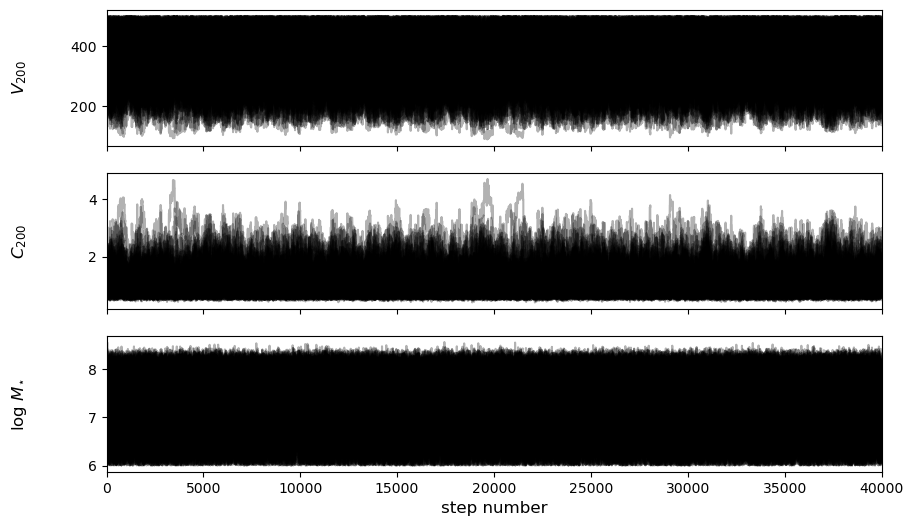

In [9]:
#Membuat plot masing-masing parameter (MCMC chains) untuk mengecek konvergensi
fig, axes = plt.subplots(ndim, figsize=(10, 6), sharex=True)
samples = sampler.get_chain()
labels = [r"$V_{200}$", r"$C_{200}$", r"log $M_{\star}$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i], fontsize=12)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number", fontsize=12);
plt.savefig('Trace plot {} (NFW).jpg'.format(df['ID'][0]), bbox_inches = 'tight', dpi=300)

In [10]:
# Flat: concatenating the samples from each walker in the chain
# Discard: menghapus X sampel (flattened) pertama
# Thin: mengambil sampel kelipatan ke-X saja (untuk merampingkan sampel dan menghemat ukuran sampel)
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
np.savetxt("Flat samples {} (NFW).txt".format(df['ID'][0]), np.c_[flat_samples[:, 0],flat_samples[:, 1],flat_samples[:, 2]])

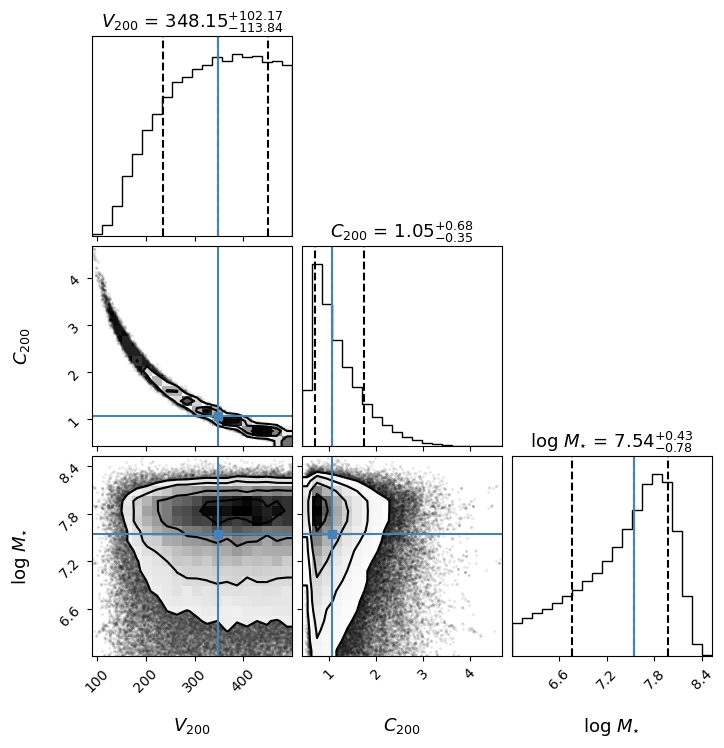

In [8]:
#Membuat corner plot
#Menyimpan nilai best-fit parameter hasil MCMC
flat_samples = np.loadtxt("Flat samples {} (NFW).txt".format(df['ID'][0]))
labels = [r"$V_{200}$", r"$C_{200}$", r"log $M_{\star}$"]

V200 = np.median(flat_samples[:, 0])
C200 = np.median(flat_samples[:, 1])
M_disk = np.median(flat_samples[:, 2])

fig = corner.corner(flat_samples,show_titles=True,title_kwargs={"fontsize":13},labels=labels,label_kwargs={"fontsize":13},plot_datapoints=True,truths=[V200, C200, M_disk],quantiles=[0.16, 0.5, 0.84],dpi=200)
plt.savefig('Corner plot {} (NFW).jpg'.format(df['ID'][0]), bbox_inches = 'tight', dpi=300)

In [9]:
#Menghitung kecepatan komponen halo DM dan kecepatan total menggunakan nilai best-fit
vDM = VDM(rad, V200, C200)
Vdisk_values = Vdisk(rad, M_disk, r_star)
Vgas_values = Vgas(rad, M_gas, r_gas)
vtot = Vtot(vDM, Vdisk_values, Vgas_values)

In [10]:
#Menuliskan nilai best-fit parameter hasil MCMC dan reduced chi squared
labels2 = ["V_{200}", "C_{200}", "log M_{\star}"]
ndim = 3
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{+{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels2[i])
    display(Math(txt))

rsn = V200 / (0.678 * C200)
trsn = "\mathrm r_{{s,NFW}} = {0:.3f} \, \\textrm{{kpc}}".format(rsn)
r200n = C200*rsn
tr200n = "\mathrm r_{{200,NFW}} = {0:.3f} \, \\textrm{{kpc}}".format(r200n)
H0 = 67.8
G = 4.3e-6
m200n = np.log10(V200 ** 2 * r200n / G)
tm200n = "$\log M_{{200,\mathrm{{NFW}}}} (\mathrm{{M_{{\odot}}}}) = {0:.3f}$".format(m200n)
display(Math(trsn))
display(Math(tr200n))
display(Math(tm200n))

chisq = 0.
for i in range(len(rad)):
    chisq = chisq + (((Vobs[i] - vtot[i])**2)/(Vobs_err[i])**2)

red_chisq = chisq/(len(rad) - ndim) #reduced chi squared
txt2 = "\mathrm\chi_{{\\nu}}^2 = {0:.3f}".format(red_chisq)
display(Math(txt2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
print("Mean autocorrelation time (NFW): {0:.4f}".format(np.mean(sampler.get_autocorr_time())))

In [15]:
print("Mean acceptance fraction (NFW): {0:.4f}".format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction (NFW): 0.4751


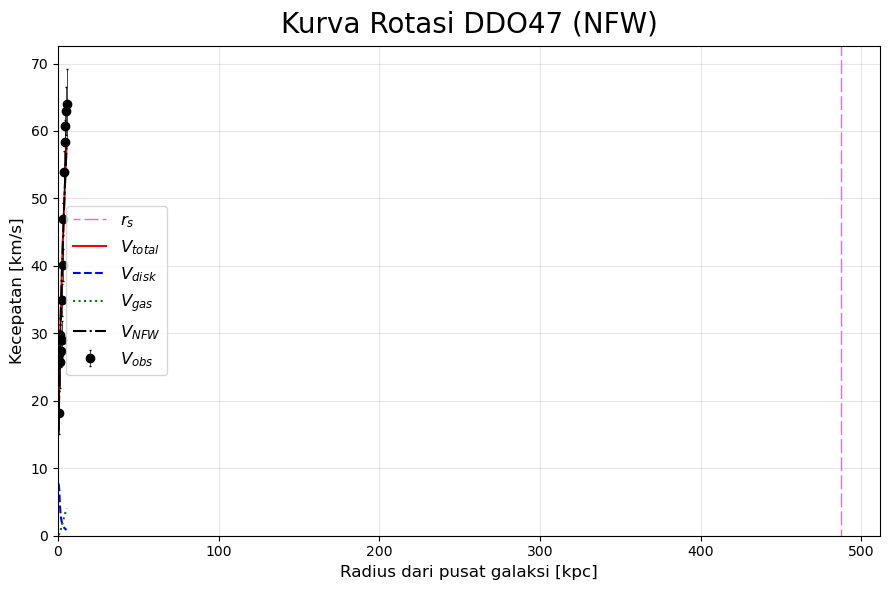

In [11]:
#Membuat plot kurva rotasi
plt.figure(figsize=(9,6))
plt.axvline(x = rsn, c = 'orchid', linewidth = 1.0, linestyle = (5, (10, 3)), label = '$r_s$')
plt.plot(rad, vtot, label = '$V_{total}$', c = "red", linewidth = 1.5, linestyle = 'solid') # Komponen total
plt.errorbar(rad, Vobs, Vobs_err, label = '$V_{obs}$', elinewidth = 0.5, fmt = 'ko', capsize = 1) # Komponen teramati
plt.plot(rad, Vdisk_values, label = '$V_{disk}$', c = "blue", linewidth = 1.5, linestyle = 'dashed') # Komponen disk
plt.plot(rad, Vgas_values, label = '$V_{gas}$', c = "green", linewidth = 1.5, linestyle = 'dotted') # Komponen gas
plt.plot(rad, vDM, label = '$V_{NFW}$', c = "black", linewidth = 1.5, linestyle = 'dashdot') # Komponen DM
plt.title('Kurva Rotasi {} (NFW)'.format(df['ID'][0]), pad=10, size=20)
plt.ylim(0,); plt.xlim(0,)
plt.xlabel('Radius dari pusat galaksi [kpc]', size=12)
plt.ylabel('Kecepatan [km/s]', size=12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(alpha = 0.3)
plt.savefig('Kurva Rotasi {} (NFW).jpg'.format(df['ID'][0]), bbox_inches = 'tight', dpi = 300)
plt.show()

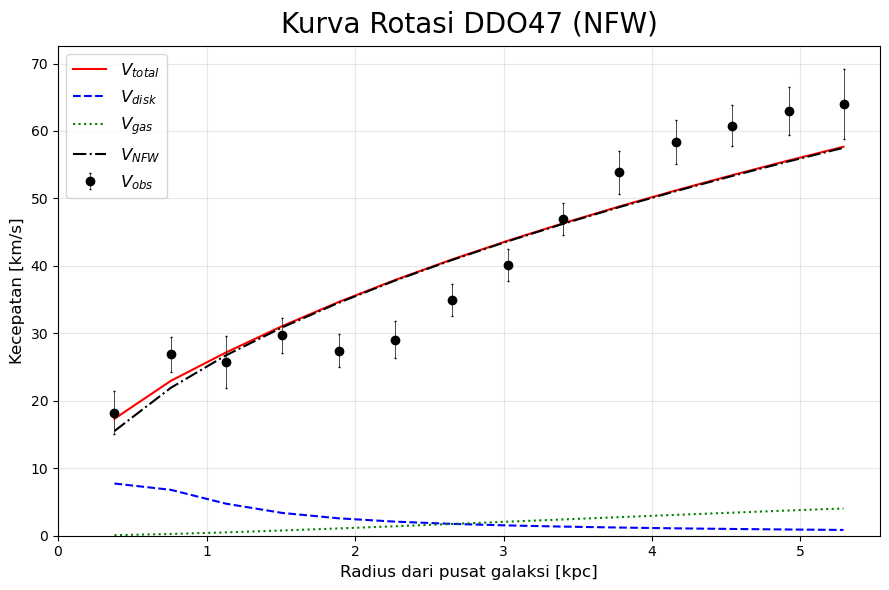

In [12]:
#Membuat plot kurva rotasi
plt.figure(figsize=(9,6))
plt.plot(rad, vtot, label = '$V_{total}$', c = "red", linewidth = 1.5, linestyle = 'solid') # Komponen total
plt.errorbar(rad, Vobs, Vobs_err, label = '$V_{obs}$', elinewidth = 0.5, fmt = 'ko', capsize = 1) # Komponen teramati
plt.plot(rad, Vdisk_values, label = '$V_{disk}$', c = "blue", linewidth = 1.5, linestyle = 'dashed') # Komponen disk
plt.plot(rad, Vgas_values, label = '$V_{gas}$', c = "green", linewidth = 1.5, linestyle = 'dotted') # Komponen gas
plt.plot(rad, vDM, label = '$V_{NFW}$', c = "black", linewidth = 1.5, linestyle = 'dashdot') # Komponen DM
plt.title('Kurva Rotasi {} (NFW)'.format(df['ID'][0]), pad=10, size=20)
plt.ylim(0,); plt.xlim(0,)
plt.xlabel('Radius dari pusat galaksi [kpc]', size=12)
plt.ylabel('Kecepatan [km/s]', size=12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(alpha = 0.3)
plt.savefig('Kurva Rotasi {} (NFW) 2.jpg'.format(df['ID'][0]), bbox_inches = 'tight', dpi = 300)
plt.show()

In [13]:
rsmooth = np.linspace(df['R[kpc]'][0], df['R[kpc]'][df['R[kpc]'].argmax()], 1000)
vDM = VDM(rsmooth,V200, C200)

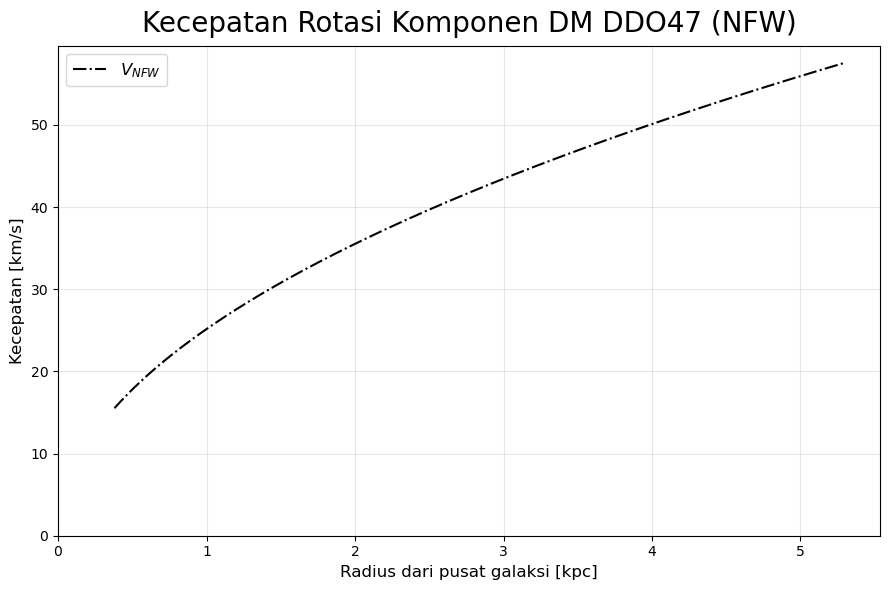

In [14]:
#Membuat plot kurva rotasi DM
plt.figure(figsize=(9,6))
#plt.axvline(x = rsn, c = 'orchid', linewidth = 1.0, linestyle = (5, (10, 3)), label = '$r_s$')
plt.plot(rsmooth, vDM, label = '$V_{NFW}$', c = "black", linewidth = 1.5, linestyle = 'dashdot') # Komponen DM
plt.title('Kecepatan Rotasi Komponen DM {} (NFW)'.format(df['ID'][0]), pad=10, size=20)
plt.ylim(0,); plt.xlim(0,)
plt.xlabel('Radius dari pusat galaksi [kpc]', size=12)
plt.ylabel('Kecepatan [km/s]', size=12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(alpha = 0.3)
plt.savefig('Kecepatan Rotasi Komponen DM {} (NFW).jpg'.format(df['ID'][0]), format = 'jpg', dpi = 150)
plt.show()

# 1sigma posterior spread (NFW)

In [15]:
def sample_walkers(nsamples,flattened_chain):
    models = []
    draw = np.floor(np.random.uniform(0,len(flattened_chain),size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    for i in thetas:
        vDM = VDM(rad, i[0], i[1])
        vtot = Vtot(vDM, Vdisk_values, Vgas_values)
        models.append(vtot)
    spread = np.std(models,axis=0)
    med_model = np.median(models,axis=0)
    return med_model,spread
med_model, spread = sample_walkers(10000,flat_samples)

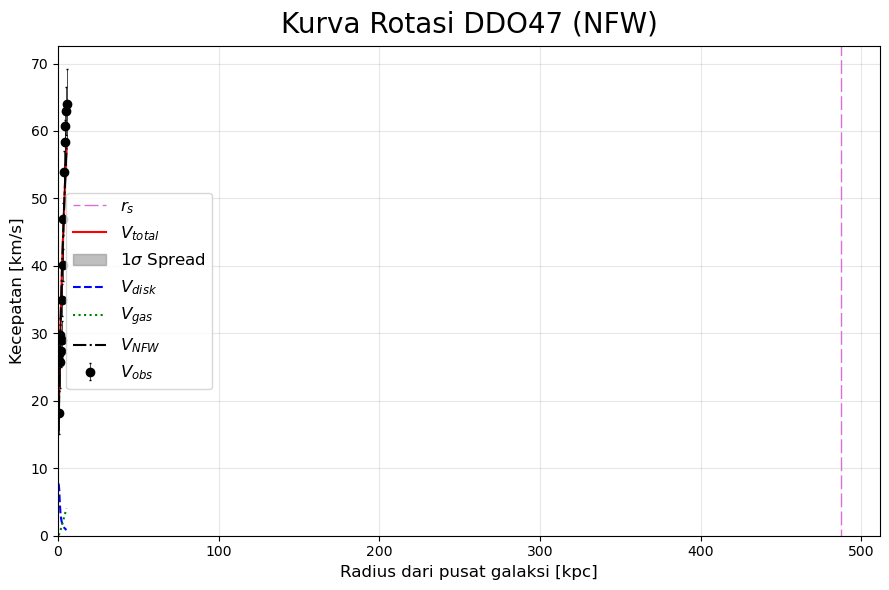

In [16]:
#Membuat plot kurva rotasi dengan 1sigma posterior spread
vDM = VDM(rad, V200, C200)
plt.figure(figsize=(9,6))
plt.axvline(x = rsn, c = 'orchid', linewidth = 1.0, linestyle = (5, (10, 3)), label = '$r_s$')
plt.plot(rad, vtot, label = '$V_{total}$', c = "red", linewidth = 1.5, linestyle = 'solid') # Komponen total
plt.fill_between(rad,med_model-spread,med_model+spread,color='grey',alpha=0.5,label=r'$1\sigma$ Spread')
plt.errorbar(rad, Vobs, Vobs_err, label = '$V_{obs}$', elinewidth = 0.5, fmt = 'ko', capsize = 1) # Komponen teramati
plt.plot(rad, Vdisk_values, label = '$V_{disk}$', c = "blue", linewidth = 1.5, linestyle = 'dashed') # Komponen disk
plt.plot(rad, Vgas_values, label = '$V_{gas}$', c = "green", linewidth = 1.5, linestyle = 'dotted') # Komponen gas
plt.plot(rad, vDM, label = '$V_{NFW}$', c = "black", linewidth = 1.5, linestyle = 'dashdot') # Komponen DM
plt.title('Kurva Rotasi {} (NFW)'.format(df['ID'][0]), pad=10, size=20)
plt.ylim(0,); plt.xlim(0,)
plt.xlabel('Radius dari pusat galaksi [kpc]', size=12)
plt.ylabel('Kecepatan [km/s]', size=12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(alpha = 0.3)
plt.savefig('Kurva Rotasi {} 1sigma (NFW).jpg'.format(df['ID'][0]), format = 'jpg', dpi = 150)
plt.show()

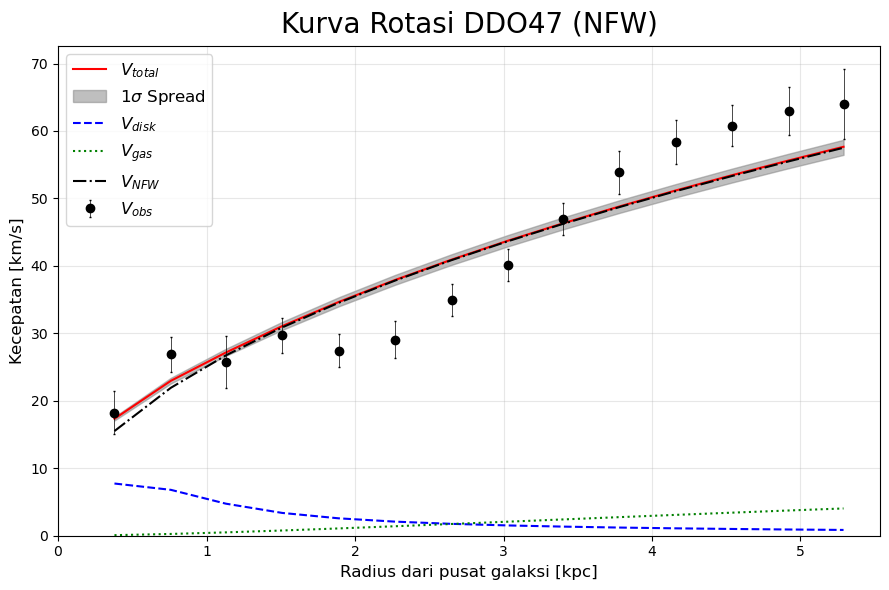

In [17]:
#Membuat plot kurva rotasi dengan 1sigma posterior spread
plt.figure(figsize=(9,6))
plt.plot(rad, vtot, label = '$V_{total}$', c = "red", linewidth = 1.5, linestyle = 'solid') # Komponen total
plt.fill_between(rad,med_model-spread,med_model+spread,color='grey',alpha=0.5,label=r'$1\sigma$ Spread')
plt.errorbar(rad, Vobs, Vobs_err, label = '$V_{obs}$', elinewidth = 0.5, fmt = 'ko', capsize = 1) # Komponen teramati
plt.plot(rad, Vdisk_values, label = '$V_{disk}$', c = "blue", linewidth = 1.5, linestyle = 'dashed') # Komponen disk
plt.plot(rad, Vgas_values, label = '$V_{gas}$', c = "green", linewidth = 1.5, linestyle = 'dotted') # Komponen gas
plt.plot(rad, vDM, label = '$V_{NFW}$', c = "black", linewidth = 1.5, linestyle = 'dashdot') # Komponen DM
plt.title('Kurva Rotasi {} (NFW)'.format(df['ID'][0]), pad=10, size=20)
plt.ylim(0,); plt.xlim(0,)
plt.xlabel('Radius dari pusat galaksi [kpc]', size=12)
plt.ylabel('Kecepatan [km/s]', size=12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(alpha = 0.3)
plt.savefig('Kurva Rotasi {} 1sigma (NFW) 2.jpg'.format(df['ID'][0]), format = 'jpg', dpi = 150)
plt.show()

## Maximum A Posteriori (NFW)

In [23]:
lnprob_samples = sampler.get_log_prob(discard=500, thin=15, flat=True)
np.savetxt("Lnprob samples {} (NFW).txt".format(df['ID'][0]), np.c_[lnprob_samples[:]])

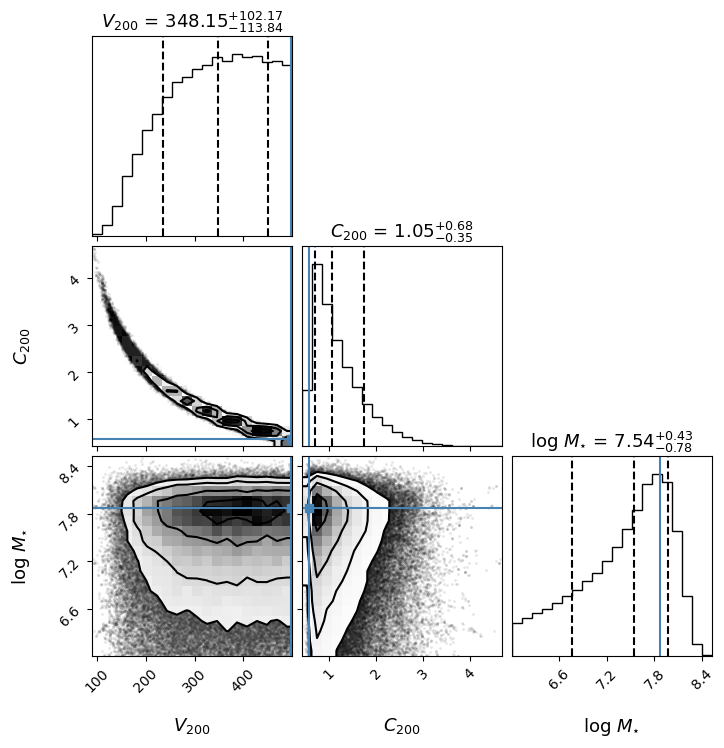

In [18]:
lnprob_samples = np.loadtxt("Lnprob samples {} (NFW).txt".format(df['ID'][0]))
theta_max = flat_samples[np.argmax(lnprob_samples)]

#Menyimpan nilai best-fit parameter hasil MCMC
V200 = theta_max[0]
C200 = theta_max[1]
M_disk = theta_max[2]

fig = corner.corner(flat_samples,show_titles=True,title_kwargs={"fontsize":13},labels=labels,label_kwargs={"fontsize":13},plot_datapoints=True,truths=[V200,C200,M_disk],quantiles=[0.16, 0.5, 0.84],dpi=200)
plt.savefig('Corner plot MAP {} (NFW).jpg'.format(df['ID'][0]), bbox_inches = 'tight', dpi=300)

In [19]:
# Find the index of the maximum log-probability
max_lnprob_index = np.argmax(lnprob_samples)

# Calculate the maximum likelihood (exponent of the maximum log-probability)
max_likelihood = np.exp(lnprob_samples[max_lnprob_index])

# Number of parameters in the model
k = len(theta_max)

# Number of data points (assuming `n` is provided, e.g., `n` is the length of the data)
n = len(df)

# Calculate BIC
bic = k * np.log(n) - 2 * lnprob_samples[max_lnprob_index]

print("ml:", max_likelihood)
print("BIC:", bic)

np.savetxt('BIC {} (NFW).txt'.format(df['ID'][0]), np.c_[bic], fmt='% 1.3f', header='BIC')

ml: 2.3502393325445718e-27
BIC: 130.54773267731156


In [20]:
#Menghitung kecepatan komponen halo DM dan kecepatan total menggunakan nilai best-fit
vDM = VDM(rad, V200, C200)
vtot = Vtot(vDM, Vdisk_values, Vgas_values)

In [21]:
#Menuliskan nilai best-fit parameter hasil MCMC dan reduced chi squared
for i in range(ndim):
    std = np.std(flat_samples[:, i])
    txt = "\mathrm{{{2}}} = {0:.3f} \pm {1:.3f}"
    txt = txt.format(theta_max[i], std, labels2[i])
    display(Math(txt))

rsn = V200 / (0.678 * C200)
trsn = "\mathrm r_{{s,NFW}} = {0:.3f} \, \\textrm{{kpc}}".format(rsn)
r200n = C200*rsn
tr200n = "\mathrm r_{{200,NFW}} = {0:.3f} \, \\textrm{{kpc}}".format(r200n)
H0 = 67.8
G = 4.3e-6
m200n = np.log10(V200 ** 2 * r200n / G)
tm200n = "$\log M_{{200,\mathrm{{NFW}}}} (\mathrm{{M_{{\odot}}}}) = {0:.3f}$".format(m200n)
display(Math(trsn))
display(Math(tr200n))
display(Math(tm200n))

chisq = 0.
for i in range(len(rad)):
    chisq = chisq + (((Vobs[i] - vtot[i])**2)/(Vobs_err[i])**2)

red_chisq = chisq/(len(rad) - ndim) #reduced chi squared
txt2 = "\mathrm\chi_{{\\nu}}^2 = {0:.3f}".format(red_chisq)
display(Math(txt2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

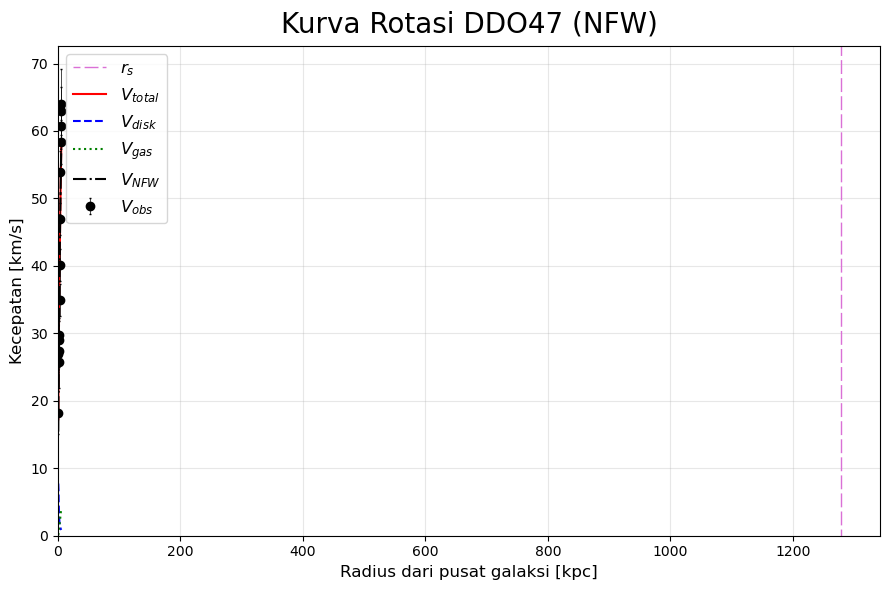

In [22]:
#Membuat plot kurva rotasi
plt.figure(figsize=(9,6))
plt.axvline(x = rsn, c = 'orchid', linewidth = 1.0, linestyle = (5, (10, 3)), label = '$r_s$')
plt.plot(rad, vtot, label = '$V_{total}$', c = "red", linewidth = 1.5, linestyle = 'solid') # Komponen total
plt.errorbar(rad, Vobs, Vobs_err, label = '$V_{obs}$', elinewidth = 0.5, fmt = 'ko', capsize = 1) # Komponen teramati
plt.plot(rad, Vdisk_values, label = '$V_{disk}$', c = "blue", linewidth = 1.5, linestyle = 'dashed') # Komponen disk
plt.plot(rad, Vgas_values, label = '$V_{gas}$', c = "green", linewidth = 1.5, linestyle = 'dotted') # Komponen gas
plt.plot(rad, vDM, label = '$V_{NFW}$', c = "black", linewidth = 1.5, linestyle = 'dashdot') # Komponen DM
plt.title('Kurva Rotasi {} (NFW)'.format(df['ID'][0]), pad=10, size=20)
plt.ylim(0,); plt.xlim(0,)
plt.xlabel('Radius dari pusat galaksi [kpc]', size=12)
plt.ylabel('Kecepatan [km/s]', size=12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(alpha = 0.3)
plt.savefig('Kurva Rotasi MAP {} (NFW).jpg'.format(df['ID'][0]), bbox_inches = 'tight', dpi = 300)
plt.show()

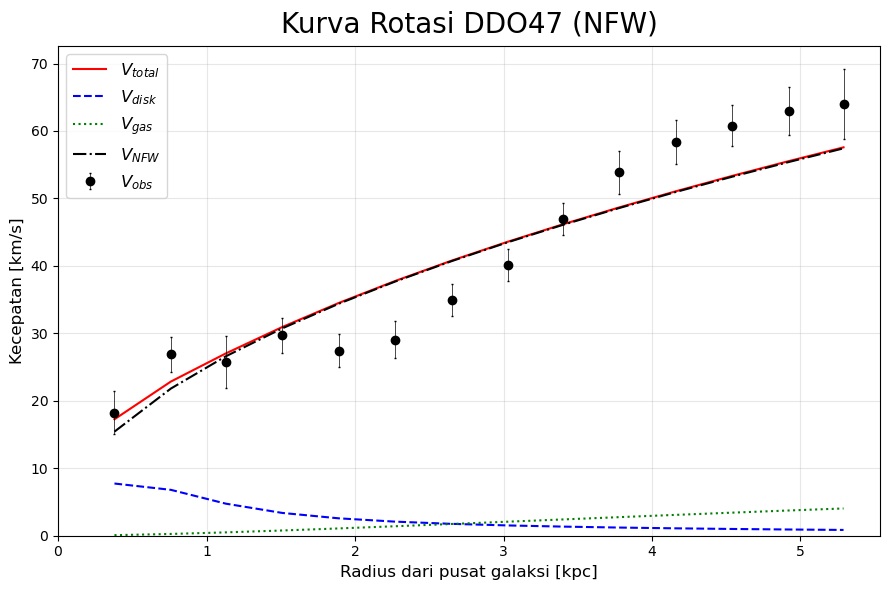

In [23]:
#Membuat plot kurva rotasi
plt.figure(figsize=(9,6))
plt.plot(rad, vtot, label = '$V_{total}$', c = "red", linewidth = 1.5, linestyle = 'solid') # Komponen total
plt.errorbar(rad, Vobs, Vobs_err, label = '$V_{obs}$', elinewidth = 0.5, fmt = 'ko', capsize = 1) # Komponen teramati
plt.plot(rad, Vdisk_values, label = '$V_{disk}$', c = "blue", linewidth = 1.5, linestyle = 'dashed') # Komponen disk
plt.plot(rad, Vgas_values, label = '$V_{gas}$', c = "green", linewidth = 1.5, linestyle = 'dotted') # Komponen gas
plt.plot(rad, vDM, label = '$V_{NFW}$', c = "black", linewidth = 1.5, linestyle = 'dashdot') # Komponen DM
plt.title('Kurva Rotasi {} (NFW)'.format(df['ID'][0]), pad=10, size=20)
plt.ylim(0,); plt.xlim(0,)
plt.xlabel('Radius dari pusat galaksi [kpc]', size=12)
plt.ylabel('Kecepatan [km/s]', size=12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(alpha = 0.3)
plt.savefig('Kurva Rotasi MAP {} (NFW) 2.jpg'.format(df['ID'][0]), bbox_inches = 'tight', dpi = 300)
plt.show()

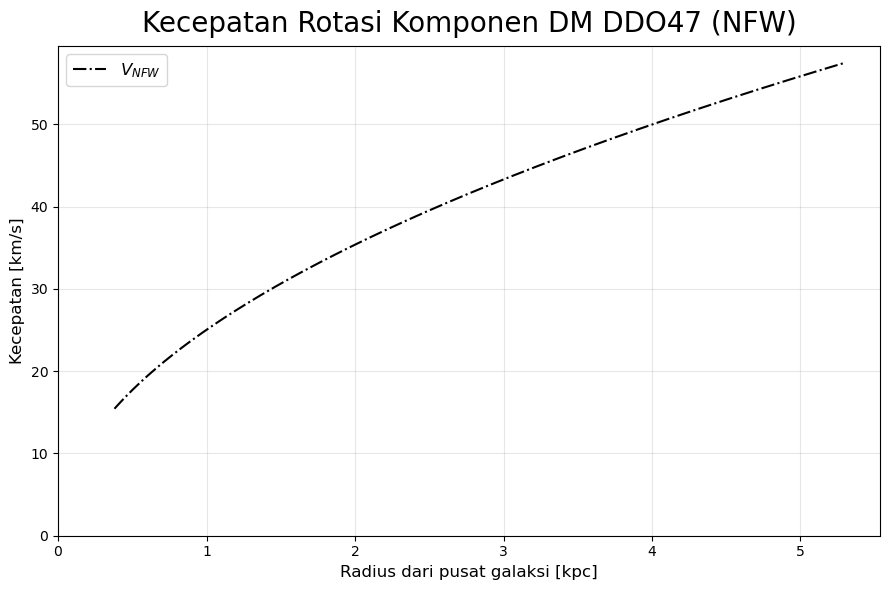

In [24]:
#Membuat plot kurva rotasi DM
vDM = VDM(rsmooth,V200, C200)
plt.figure(figsize=(9,6))
#plt.axvline(x = rsn, c = 'orchid', linewidth = 1.0, linestyle = (5, (10, 3)), label = '$r_s$')
plt.plot(rsmooth, vDM, label = '$V_{NFW}$', c = "black", linewidth = 1.5, linestyle = 'dashdot') # Komponen DM
plt.title('Kecepatan Rotasi Komponen DM {} (NFW)'.format(df['ID'][0]), pad=10, size=20)
plt.ylim(0,); plt.xlim(0,)
plt.xlabel('Radius dari pusat galaksi [kpc]', size=12)
plt.ylabel('Kecepatan [km/s]', size=12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.grid(alpha = 0.3)
plt.savefig('Kecepatan Rotasi Komponen DM MAP {} (NFW).jpg'.format(df['ID'][0]), format = 'jpg', dpi = 150)
plt.show()

In [25]:
# Create a CubicSpline object
c1 = CubicSpline(rad, vtot)
c2= CubicSpline(rad, Vdisk_values)
c3 = CubicSpline(rad, Vgas_values)
c4 = CubicSpline(rsmooth, vDM)

# Use the spline interpolator to get the interpolated y-value
total = c1(r_eff)
bintang = c2(r_eff)
gas = c3(r_eff)
dm = c4(r_eff)
# Print or use the result as needed
print(f"At x = {r_eff}, total = {total}")
print(f"At x = {r_eff}, bintang = {bintang}")
print(f"At x = {r_eff}, gas = {gas}")
print(f"At x = {r_eff}, dm = {dm}")

At x = 2.14, total = 36.67475992848932
At x = 2.14, bintang = 2.2314279092405087
At x = 2.14, gas = 1.2925906346132037
At x = 2.14, dm = 36.584435880501744


In [26]:
G = 4.3e-6
Mstar = (10**M_disk)*(1-(1+r_eff/r_star)*np.exp(-r_eff/r_star))
Mgas = (10**M_gas)*(1-(1+r_eff/r_gas)*np.exp(-r_eff/r_gas))
M_bar = Mstar + 1.33*(Mgas)
M_bar

74040040.69872724

In [27]:
M_dm = (dm**2 * r_eff)/G
M_dm

666097867.4898424

In [28]:
frac = M_dm/(M_bar+M_dm)
frac

0.8999645337989315

In [29]:
# Use the spline interpolator to get the interpolated y-value
r_opt = (3.2/1.69)*r_eff
total1 = c1(r_opt)
bintang1 = c2(r_opt)
gas1 = c3(r_opt)
dm1 = c4(r_opt)

# Print or use the result as needed
print(f"At x = {r_opt}, total = {total1}")
print(f"At x = {r_opt}, bintang = {bintang1}")
print(f"At x = {r_opt}, gas = {gas1}")
print(f"At x = {r_opt}, dm = {dm1}")

At x = 4.05207100591716, total = 50.39337831963285
At x = 4.05207100591716, bintang = 1.1260665431291412
At x = 4.05207100591716, gas = 2.9954223164539884
At x = 4.05207100591716, dm = 50.291661154728615


In [30]:
Mstar1 = (10**M_disk)*(1-(1+r_opt/r_star)*np.exp(-r_opt/r_star))
Mgas1 = (10**M_gas)*(1-(1+r_opt/r_gas)*np.exp(-r_opt/r_gas))
M_bar1 = Mstar1 + 1.33*(Mgas1)
M_bar1

114824868.02101311

In [31]:
M_dm1 = (dm1**2 * r_opt)/G
M_dm1

2383419855.8271036

In [32]:
frac1 = M_dm1/(M_bar1+M_dm1)
frac1

0.9540377822377044

In [33]:
np.savetxt('Parameter {} (NFW).txt'.format(df['ID'][0]), np.c_[rsn, r200n, m200n, red_chisq, frac, frac1], fmt='% 1.3f', header='rs    r200    m200    rcs    frac   frac_o')